In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [36]:
df = pd.read_csv('data_leak.csv')
df1 = pd.read_csv('08Aug2024_15data.csv')

In [37]:
df["Pressure_leak"] = df["Value 1"]
df.drop("Value 1", axis=1, inplace=True)
df1["Pressure_norm"] = df1["Value 1"]
df1.drop("Value 1", axis=1, inplace=True)

In [38]:
df["Pressure_norm"] = df1["Pressure_norm"]


In [39]:
# normalise on base line
baseline1 = df["Pressure_norm"][:10]
baseline2 = df["Pressure_leak"][:10]
mean_baseline1 = np.mean(baseline1)
std_baseline1 = np.std(baseline1)
mean_baseline2 = np.mean(baseline2)
std_baseline2 = np.std(baseline2)

df["P_normalised"] = (df["Pressure_norm"] - mean_baseline1) / std_baseline1

df["P_leak_normalised"] = (df["Pressure_leak"] - mean_baseline2) / std_baseline2

In [40]:
df.head()

,Pressure_leak,Pressure_norm,P_normalised,P_leak_normalised
0,1034.4,1039.1,-0.229416,-1.333333
1,1034.5,1039.2,0.917663,0.333333
2,1034.5,1039.2,0.917663,0.333333
3,1034.5,1039.1,-0.229416,0.333333
4,1034.4,1039.2,0.917663,-1.333333


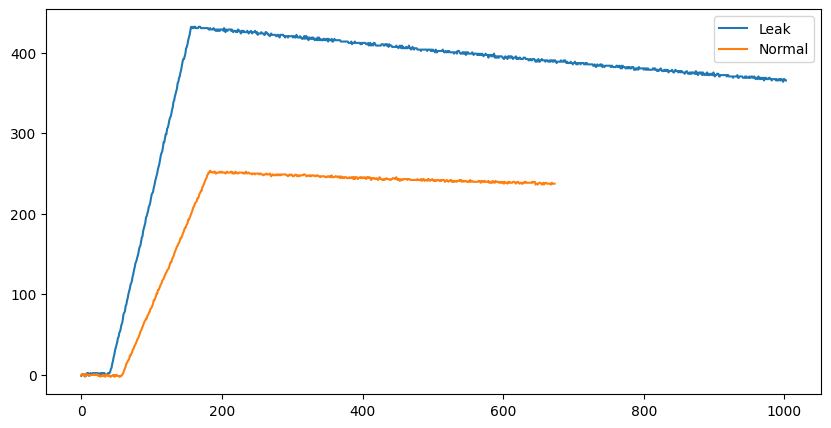

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["P_leak_normalised"], label="Leak")
plt.plot(df.index, df["P_normalised"], label="Normal")
plt.legend()
plt.show()

In [25]:
#df["Pressure_norm"] = df1["Pressure_norm"]
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_norm = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
#df_norm = df

In [42]:
df["smoothed_leak"] = df["P_leak_normalised"].rolling(window=40).mean()
df["smoothed_norm"] = df["P_normalised"].rolling(window=40).mean()

In [26]:
#df_norm["smoothed"] = df_norm["Pressure"].rolling(window=40).mean()
#df_norm["smoothed1"] = df_norm["Pressure1"].rolling(window=40).mean()

In [27]:
#df_norm["RoC"]= df_norm["smoothed"].pct_change()
#df_norm["RoC1"]= df_norm["smoothed1"].pct_change()
#df_norm["diff"]= df_norm["smoothed"].diff()
#df_norm["diff1"]= df_norm["smoothed1"].diff()

C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_4712\1096179776.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_norm["RoC1"]= df_norm["smoothed1"].pct_change()


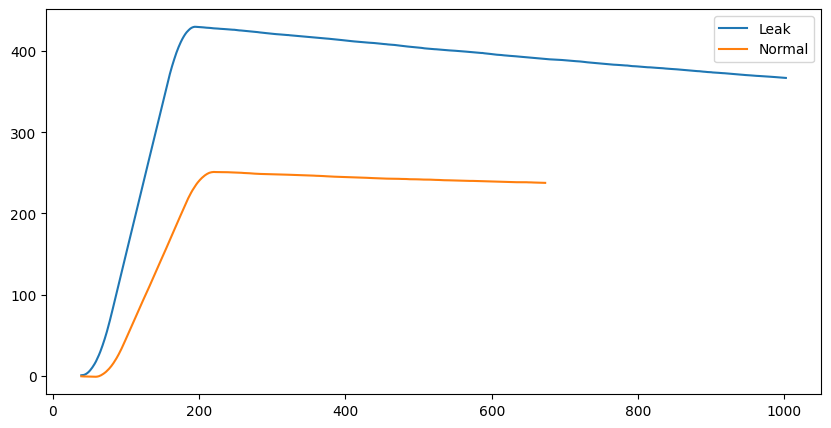

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["smoothed_leak"], label="Leak")
plt.plot(df.index, df["smoothed_norm"], label="Normal")
plt.legend()
plt.show()

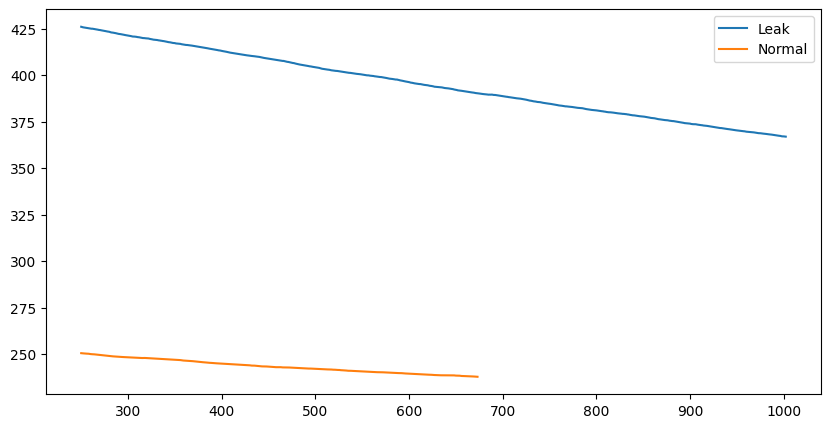

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(df.index[250:], df["smoothed_leak"][250:], label="Leak")
plt.plot(df.index[250:], df["smoothed_norm"][250:], label="Normal")
plt.legend()
plt.show()

In [55]:
# calculating the slope
start_index = 250
end_index = 600
range_index = np.arange(start_index, end_index+1).reshape(-1, 1)
range_leak = df["smoothed_leak"][start_index:end_index+1]
range_normal = df["smoothed_norm"][start_index:end_index+1]

model_leak = LinearRegression().fit(range_index, range_leak)
slope_leak = model_leak.coef_[0]
model_norm = LinearRegression().fit(range_index, range_normal)
slope_norm = model_norm.coef_[0]

print("the slope of leak traces is: " + str(slope_leak))
print("the slope of norm traces is: " + str(slope_norm))

the slope of leak traces is: -0.08484399859407543
the slope of norm traces is: -0.031011852431872534


In [ ]:
df["RoC_leak"]= df["smoothed_leak"].pct_change()
df["RoC_norm"]= df["smoothed_norm"].pct_change()
df["diff_leak"]= df["smoothed_leak"].diff()
df["diff_norm"]= df["smoothed_norm"].diff()

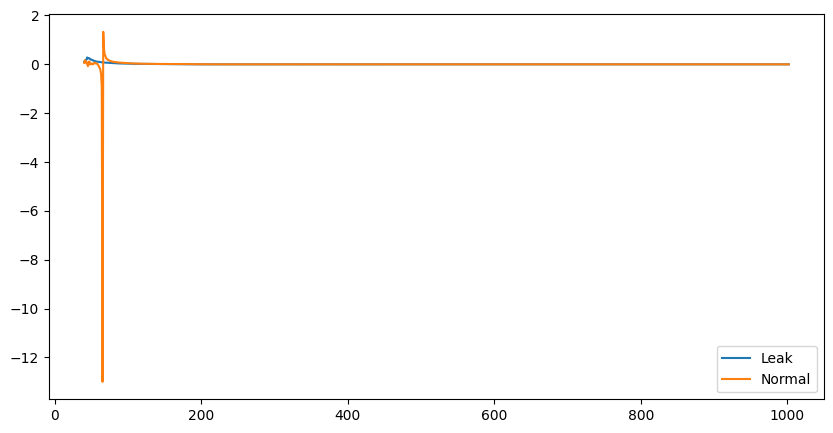

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["RoC_leak"], label="Leak")
plt.plot(df.index, df["RoC_norm"], label="Normal")
plt.legend()
plt.show()


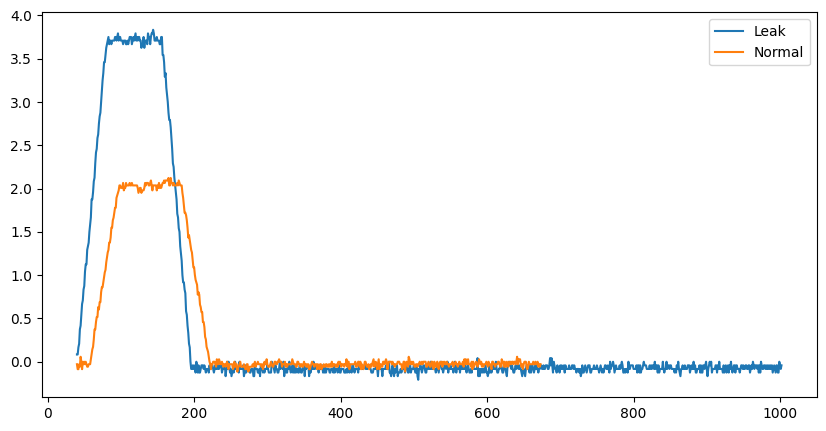

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["diff_leak"], label="Leak")
plt.plot(df.index, df["diff_norm"], label="Normal")
plt.legend()
plt.show()

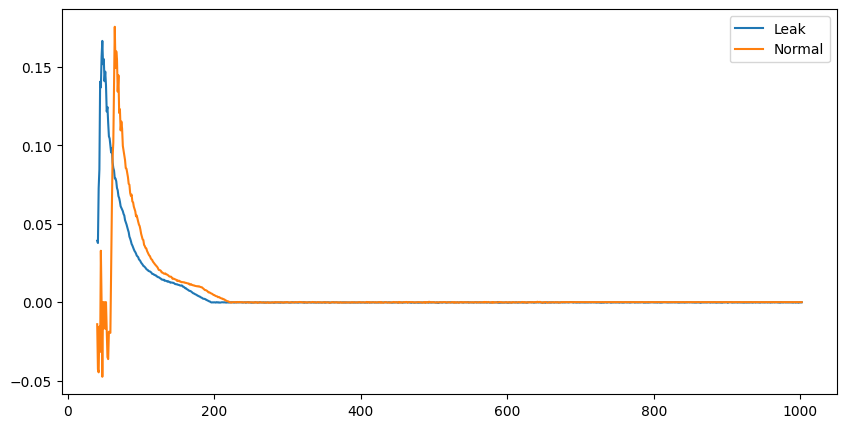

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df_norm.index, df_norm["RoC"], label="Leak")
plt.plot(df_norm.index, df_norm["RoC1"], label="Normal")
plt.legend()
plt.show()


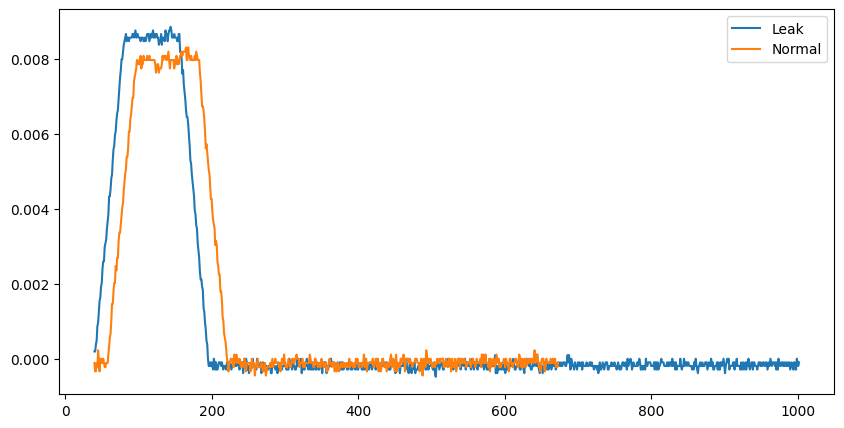

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df_norm.index, df_norm["diff"], label="Leak")
plt.plot(df_norm.index, df_norm["diff1"], label="Normal")
plt.legend()
plt.show()

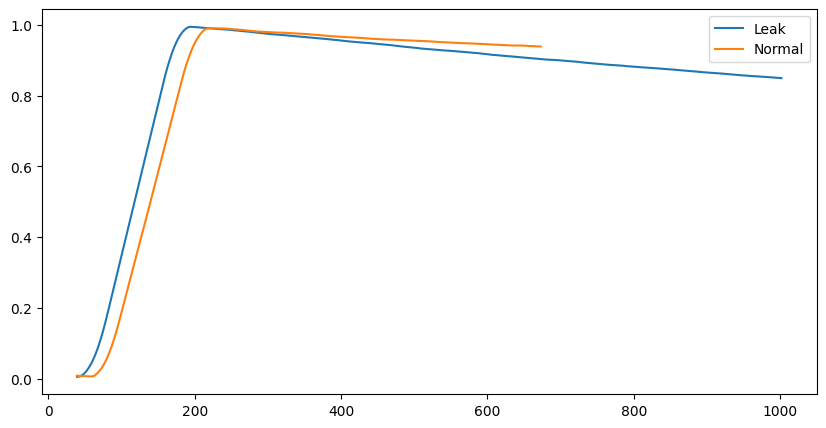

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df_norm.index, df_norm["smoothed"], label="Leak")
plt.plot(df_norm.index, df_norm["smoothed1"], label="Normal")
plt.legend()
plt.show()

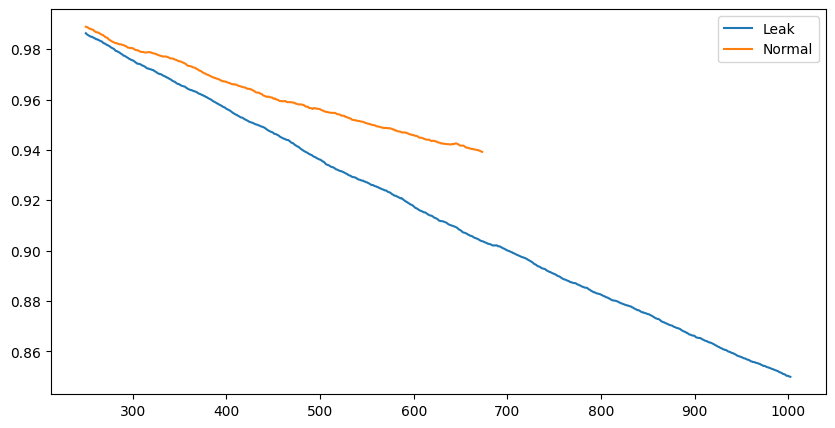

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df_norm.index[250:], df_norm["smoothed"][250:], label="Leak")
plt.plot(df_norm.index[250:], df_norm["smoothed1"][250:], label="Normal")
plt.legend()
plt.show()